## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict

## Data

In [2]:
data = pd.read_csv('MSFT.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-14,204.240005,209.199997,204.029999,205.410004,203.542297,30375800
1,2020-09-15,208.419998,209.779999,206.929993,208.779999,206.881653,21823900
2,2020-09-16,210.619995,210.649994,204.639999,205.050003,203.185562,26328100
3,2020-09-17,200.050003,204.330002,199.960007,202.910004,201.065033,34011300
4,2020-09-18,202.800003,203.649994,196.250000,200.389999,198.567947,55225300
...,...,...,...,...,...,...,...
246,2021-09-03,300.989990,302.600006,300.260010,301.140015,301.140015,14747900
247,2021-09-07,301.010010,301.089996,298.200012,300.179993,300.179993,17180400
248,2021-09-08,299.779999,300.609985,297.470001,300.209991,300.209991,15046800
249,2021-09-09,300.820007,302.140015,297.000000,297.250000,297.250000,19927000


## Visualization

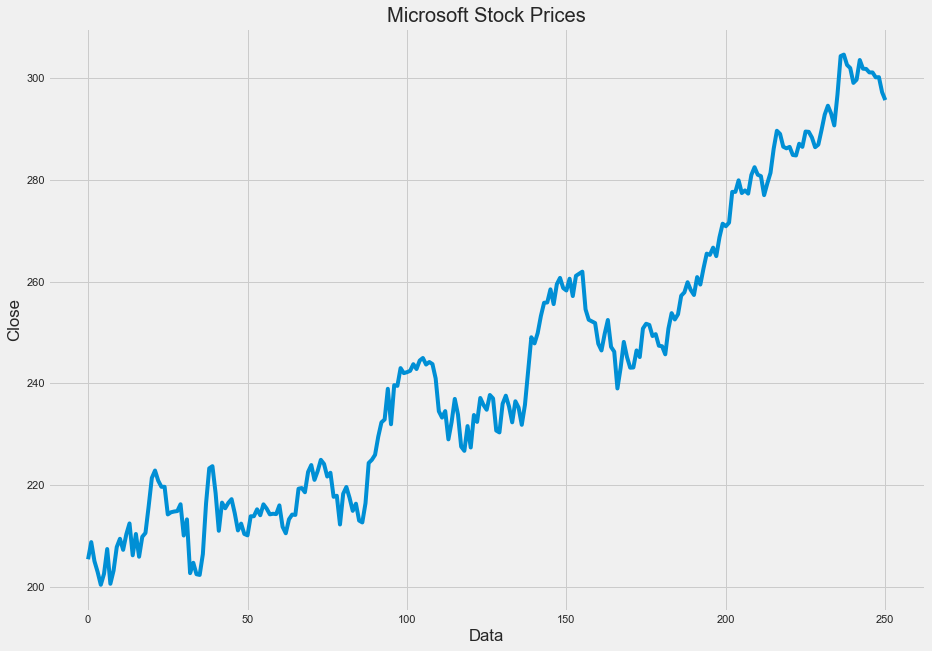

In [3]:
# The close column contains the values whose future values are being predicted.

sns.set()
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,10))
plt.title('Microsoft Stock Prices')
plt.xlabel('Data')
plt.ylabel('Close')
plt.plot(data['Close'])
plt.show()

## Correlations

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998256,0.998374,0.996023,0.996031,-0.388101
High,0.998256,1.000000,0.998455,0.998336,0.998314,-0.373242
Low,0.998374,0.998455,1.000000,0.998472,0.998496,-0.405670
Close,0.996023,0.998336,0.998472,1.000000,0.999955,-0.393462
Adj Close,0.996031,0.998314,0.998496,0.999955,1.000000,-0.393428


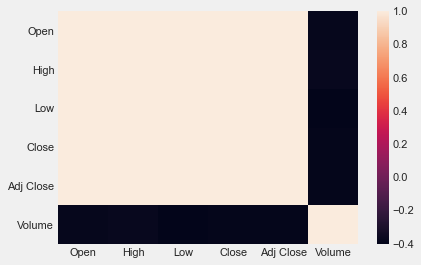

In [4]:
sns.heatmap(data.corr())
data.corr().head()

## Preprocessing

In [5]:
y = data['Close']
x = data[['Open', 'High', 'Low']]

x = x.to_numpy()
y = y.to_numpy()

y = y.reshape(-1,1)

## Training & Testing

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
# Using The Decision Tree Regression Algorithm to train the Microsoft Stock Price Prediction model and have a look at the pridicted stock prices for the nest 5 days

modle = DecisionTreeRegressor()
modle.fit(x_train, y_train)

y_predict = modle.predict(x_test)

No handles with labels found to put in legend.


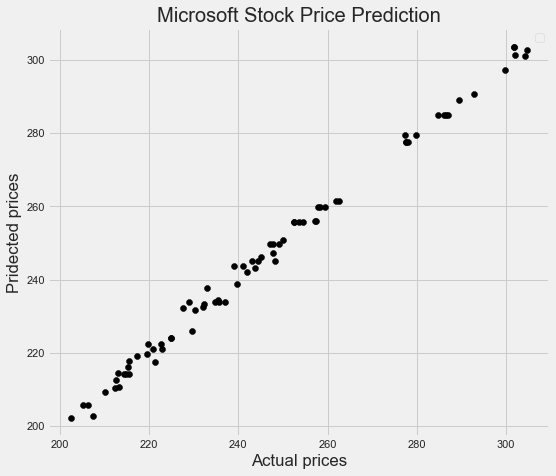

In [8]:
plt.figure(figsize=(8,7))
plt.scatter(y_test, y_predict, color='black')
plt.xlabel('Actual prices')
plt.ylabel('Pridected prices')

plt.title('Microsoft Stock Price Prediction')
plt.legend()
plt.show()

## Prediction

In [9]:

score = modle.score(x_test, y_test)
print(f"\nAccuracy: {score}")

data = pd.DataFrame(data={'Predicted Rate': y_predict})

# For Next 10 Days...
data.head(10)


Accuracy: 0.9947556197772622


,Predicted Rate
0,219.279999
1,242.199997
2,284.910004
3,277.420013
4,223.940002
5,244.990005
6,216.229996
7,225.949997
8,245.169998
9,233.779999
